In [4]:
from sys import path
import yaml
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import InMemorySaver

path.append("../src/")

from utils import format_messages
from subagents.research_supervisor import Supervisor

# compilation config
checkpointer = InMemorySaver()
compile_config = {'checkpointer': checkpointer}

# llm config
llm_config = yaml.safe_load(open("../config/llm.yaml", "rb"))

# app
app = Supervisor(
    llm_config=llm_config,
    compile_config=compile_config
)

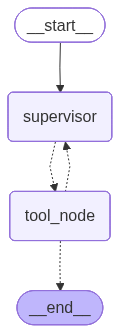

In [3]:
from IPython.display import Image, display

display(Image(app.compiled_graph.get_graph(xray=True).draw_mermaid_png()))

In [4]:
# Run the agent
from utils import format_messages
from langchain_core.messages import HumanMessage

# Example brief
research_brief = """I want to identify and evaluate the coffee shops in San Francisco that are considered the best based specifically  
on coffee quality. My research should focus on analyzing and comparing coffee shops within the San Francisco area, 
using coffee quality as the primary criterion. I am open regarding methods of assessing coffee quality (e.g.,      
expert reviews, customer ratings, specialty coffee certifications), and there are no constraints on ambiance,      
location, wifi, or food options unless they directly impact perceived coffee quality. Please prioritize primary    
sources such as the official websites of coffee shops, reputable third-party coffee review organizations (like     
Coffee Review or Specialty Coffee Association), and prominent review aggregators like Google or Yelp where direct  
customer feedback about coffee quality can be found. The study should result in a well-supported list or ranking of
the top coffee shops in San Francisco, emphasizing their coffee quality according to the latest available data as  
of July 2025."""

config = {"configurable": {"thread_id": "scoping-session-1"}}
result = await app.ainvoke(
    {"messages": [
        HumanMessage(content=f"{research_brief}.")
    ]},
    config=config
)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ I want to identify and evaluate the coffee shops in San Francisco that are considered the best based            │
│ specifically                                                                                                    │
│ on coffee quality. My research should focus on analyzing and comparing coffee shops within the San Francisco    │
│ area,                                                                                                           │
│ using coffee quality as the primary criterion. I am open regarding methods of assessing coffee quality (e.g.,   │
│ expert reviews, customer ratings, specialty coffee certifications), and there are no constraints on ambiance,   │
│ location, wifi, or food options unless they directly impact perceived coffee quality. Please prioritize primary │
│ sources such as the official websites of coffee shops, reputable third-party coffee review organizations (like  │
│ Coffee Review or Specialty Coffee Association), and prominent review aggregators like Google or Yelp where      │
│ direct                                                                                                          │
│ customer feedback about coffee quality can be found. The study should result in a well-supported list or        │
│ ranking of                                                                                                      │
│ the top coffee shops in San Francisco, emphasizing their coffee quality according to the latest available data  │
│ as                                                                                                              │
│ of July 2025..                                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "The user is looking for a comprehensive evaluation of coffee shops in San Francisco,           │
│ specifically focusing on coffee quality. This involves gathering data from various sources, including expert    │
│ reviews, customer ratings, and specialty coffee certifications. I can break this down into several sub-tasks:   │
│ 1) Identify coffee shops with high ratings for coffee quality from expert sources, 2) Gather customer reviews   │
│ from platforms like Yelp and Google, and 3) Look for any specialty coffee certifications that may indicate      │
│ quality. I will conduct research in parallel to cover these aspects efficiently."                               │
│ }                                                                                                               │
│    ID: call_on12yR3ueevh0RsjKk9yh27Q                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: The user is looking for a comprehensive evaluation of coffee shops in San Francisco,       │
│ specifically focusing on coffee quality. This involves gathering data from various sources, including expert    │
│ reviews, customer ratings, and specialty coffee certifications. I can break this down into several sub-tasks:   │
│ 1) Identify coffee shops with high ratings for coffee quality from expert sources, 2) Gather customer reviews   │
│ from platforms like Yelp and Google, and 3) Look for any specialty coffee certifications that may indicate      │
│ quality. I will conduct research in parallel to cover these aspects efficiently.                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: ConductResearch                                                                                   │
│    Args: {                                                                                                      │
│   "research_topic": "Identify coffee shops in San Francisco with high ratings for coffee quality from expert    │
│ sources like Coffee Review and Specialty Coffee Association."                                                   │
│ }                                                                                                               │
│    ID: call_NnIZCaXFP5Pt7Z6enI0D0kUC                                                                            │
│                                                                                                                 │
│ 🔧 Tool Call: ConductResearch                                                                                   │
│    Args: {                                                                                                      │
│   "research_topic": "Gather customer reviews and ratings for coffee quality from Yelp and Google for coffee     │
│ shops in San Francisco."                                                                                        │
│ }                                                                                                               │
│    ID: call_NeYjX7qBxGOqmkXyyDAjxLy2                                                                            │
│                                                                                                                 │
│ 🔧 Tool Call: ConductResearch                                                                                   │
│    Args: {                                                                                                      │
│   "research_topic": "Look for specialty coffee certifications for coffee shops in San Francisco that indicate   │
│ high coffee quality."                                                                                           │
│ }                                                                                                               │
│    ID: call_pzFRH03Hitqk8KncoMveF58Z                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ **List of Queries and Tool Calls Made**                                                                         │
│ 1. Search for best coffee shops in San Francisco on Coffee Review.                                              │
│ 2. Search for best coffee shops in San Francisco on Specialty Coffee Association.                               │
│ 3. Search for top rated coffee shops in San Francisco.                                                          │
│ 4. Search for coffee shops serving high rated coffee in San Francisco.                                          │
│ 5. Search for specific coffee shop menus for Blue Bottle Coffee, Andytown Coffee Roasters, and Four Barrel      │
│ Coffee.                                                                                                         │
│                                                                                                                 │
│ **Fully Comprehensive Findings**                                                                                │
│                                                                                                                 │
│ 1. **Coffee Review Findings**:                                                                                  │
│    - Coffee Review is recognized as the world's leading guide to coffee and espresso, providing a collection of │
│ 260 reviews specific to coffees roasted in the San Francisco area. The evaluations feature various coffees with │
│ descriptions of their flavors and aromas, including key reviews like Equator Estate Coffees & Teas' 'Arabian    │
│ Mocha Java' which is noted for its sweet cherry and dark chocolate notes. Other highlighted coffees include     │
│ 'Guatemala San Martin Buena Vista' from Four Barrel Coffee, known for its floral and apricot aromas, and        │
│ 'Ethiopia Amaro Gayo' with a complex profile of honey and blueberry. Each review offers insights into the       │
│ tasting experience, helping consumers make informed choices about their coffee preferences.                     │
│    - Notable coffees include:                                                                                   │
│      - 'Ethiopia Sidama Natural Dur Feres' scored 93, described as richly sweet and deeply fruity.              │
│      - Equator Coffees consistently ranks highly with multiple blends including a 92 for Mocha Java Blend.      │
│      - The review for Sumatra from Peet's Coffee cites earthy sweetness with hints of cocoa powder.             │
│                                                                                                                 │
│ 2. **Top Coffee Shops in San Francisco**:                                                                       │
│    - **Blue Bottle Coffee**: Known for its high-quality single-origin beans and provides a great view at its    │
│ Ferry Building location.                                                                                        │
│    - **Andytown Coffee Roasters**: Noted for its famous 'Snowy Plover' coffee float.                            │
│    - **Ritual Coffee Roasters**: A fully independent and woman-owned coffee roasting company, maintaining the   │
│ highest standards for quality.                                                                                  │
│    - **Four Barrel Coffee**: Favored for its quality and the experience of watching the roasting process.       │
│    - **Philz Coffee**: Popular for made-to-order drip coffee.                                                   │
│    - **Cafe Réveille**: Offers a charming outdoor seating option with a rotating brunch menu.                   │
│    - **Flywheel Coffee Roasters**: Praised for its handcrafted brewing methods.                                 │
│    - **The Mill**: Renowned for its exceptional toasts.

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ **List of Queries and Tool Calls Made**                                                                         │
│ 1. Customer reviews coffee quality coffee shops San Francisco site:yelp.com                                     │
│ 2. Customer reviews coffee quality coffee shops San Francisco site:google.com                                   │
│ 3. Google reviews coffee quality coffee shops San Francisco                                                     │
│ 4. Top rated coffee shops San Francisco customer reviews                                                        │
│ 5. San Francisco coffee shop reviews ratings 2023                                                               │
│ 6. Best rated coffee shops San Francisco customer reviews                                                       │
│                                                                                                                 │
│ **Fully Comprehensive Findings**                                                                                │
│                                                                                                                 │
│ ### Yelp Reviews                                                                                                │
│ 1. **Q Specialty Coffee**                                                                                       │
│    - **Rating**: 4.6 (53 reviews)                                                                               │
│    - **Location**: 3490 California St, Ste A San Francisco, CA 94118                                            │
│    - **Highlights**: This new coffee shop is superb in their coffee quality, interior design, and ambiance.     │
│ Three of us went, and the coffee drinks were all very tasty.                                                    │
│                                                                                                                 │
│ 2. **The Coffee Movement**                                                                                      │
│    - **Rating**: 4.6 (250 reviews)                                                                              │
│    - **Location**: 1737 Washington St, San Francisco, CA 94109                                                  │
│    - **Highlights**: Offers exceptional coffee in a cozy environment.                                           │
│                                                                                                                 │
│ 3. **Sightglass Coffee**                                                                                        │
│    - **Rating**: 4.5 (2.2k reviews)                                                                             │
│    - **Location**: 270 Seventh St, San Francisco, CA 94103                                                      │
│    - **Highlights**: Noted for its unique decor and high-quality espresso.                                      │
│                                                                                                                 │
│ ### Google Reviews                                                                                              │
│ 1. **Blue Bottle Coffee**                                                                                       │
│    - **Rating**: 4.5 (610 reviews)                                                                              │
│    - **Highlights**: Renowned for its intense espresso and quality coffee drinks.                               │
│                                                                                                                 │
│ 2. **Sightglass Coffee**                                                                                        │
│    - **Rating**: 4.5 (174 reviews)                     

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ **List of Queries and Tool Calls Made**                                                                         │
│ 1. Search for specialty coffee certifications for coffee shops in San Francisco that indicate high coffee       │
│ quality.                                                                                                        │
│ 2. Search for specific specialty coffee certifications from recognized bodies like the Specialty Coffee         │
│ Association (SCA).                                                                                              │
│ 3. Search for San Francisco coffee shops that hold specialty coffee certifications such as SCA, Fair Trade, and │
│ Organic.                                                                                                        │
│                                                                                                                 │
│ **Fully Comprehensive Findings**                                                                                │
│ San Francisco boasts a rich coffee culture marked by exceptional quality and innovative roasting techniques.    │
│ Renowned for its sustainability and direct trade practices, the city's coffee scene includes famous roasters    │
│ such as Blue Bottle Coffee, Ritual Coffee Roasters, and Four Barrel Coffee. These establishments prioritize     │
│ ethically sourced beans and craftsmanship, creating a vibrant community for coffee enthusiasts. Visitors can    │
│ explore various coffee experiences in the city, from traditional brewing methods to modern café culture. The    │
│ Roasters Map platform provides a comprehensive overview of San Francisco's coffee destinations, allowing coffee │
│ lovers to connect with top local roasters and cafés [1].                                                        │
│                                                                                                                 │
│ The San Francisco coffee scene has experienced significant growth, leading to the emergence of numerous         │
│ specialty coffee roasters. Key players in this scene include Ritual, Sightglass, Andytown, Wrecking Ball,       │
│ Flywheel, Linea, and Sextant. Ritual Coffee Roasters, established in 2005, is known for its responsible         │
│ sourcing and multiple locations across the city. Sightglass Coffee, founded in 2009, focuses on sustainability  │
│ and operates cafes and a roastery in both San Francisco and Los Angeles. Andytown, started in 2014 by coffee    │
│ experts Michael McCrory and Lauren Crabbe, has become popular through its all-around coffee offerings. Wrecking │
│ Ball Coffee, launched by coffee veterans Trish Rothgeb and Nicholas Cho, has made a mark in the specialty       │
│ coffee niche with its quality beans. Other notable roasters include Flywheel, Linea, known for award-winning    │
│ espresso, and Sextant, which is the only Ethiopian-owned roaster in the U.S. that emphasizes quality and        │
│ sustainability [2].                                                                                             │
│                                                                                                                 │
│ San Francisco boasts a rich specialty coffee scene with a variety of top-rated coffee shops. This guide         │
│ highlights some of the city's best spots, emphasizing diverse offerings from different neighborhoods. Notable   │
│ mentions include:                                                                                               │
│ - **Henry’s House of Coffee (9.2/10)**: A family-owned cafe known for its limited edition roasts and comforting │
│ atmosphere. Guests can enjoy a range of breakfast options alongside their coffee.                               │
│ - **Philz Coffee (9/10)**: Renowned for personalized br

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: think_tool                                                                                        │
│    Args: {                                                                                                      │
│   "reflection": "I have gathered a wealth of information regarding coffee shops in San Francisco, focusing on   │
│ coffee quality. The findings include expert reviews from Coffee Review and the Specialty Coffee Association,    │
│ customer ratings from Yelp and Google, and details about specialty coffee certifications. Key coffee shops      │
│ identified include Blue Bottle Coffee, Andytown Coffee Roasters, and Four Barrel Coffee, all noted for their    │
│ high-quality offerings. Additionally, I have information on specific coffee certifications that indicate        │
│ quality. \n\nHowever, I need to synthesize this information into a coherent ranking or list that emphasizes     │
│ coffee quality. I should also ensure that the latest data is accurately represented, as the user requested      │
│ information as of July 2025. I will now proceed to compile and organize the findings into a structured format." │
│ }                                                                                                               │
│    ID: call_PluBdWnzUmqGqVWUnbZcPDwb                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ Reflection recorded: I have gathered a wealth of information regarding coffee shops in San Francisco, focusing  │
│ on coffee quality. The findings include expert reviews from Coffee Review and the Specialty Coffee Association, │
│ customer ratings from Yelp and Google, and details about specialty coffee certifications. Key coffee shops      │
│ identified include Blue Bottle Coffee, Andytown Coffee Roasters, and Four Barrel Coffee, all noted for their    │
│ high-quality offerings. Additionally, I have information on specific coffee certifications that indicate        │
│ quality.                                                                                                        │
│                                                                                                                 │
│ However, I need to synthesize this information into a coherent ranking or list that emphasizes coffee quality.  │
│ I should also ensure that the latest data is accurately represented, as the user requested information as of    │
│ July 2025. I will now proceed to compile and organize the findings into a structured format.                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: ResearchComplete                                                                                  │
│    Args: {}                                                                                                     │
│    ID: call_vN8SWvBqAEVxIvQWOPFq6tHs                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯